In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
import numpy as np
import seaborn as sns
import os
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import scipy
import rasterio
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest as ztest
from PIL import Image
import geopandas as gpd
from osgeo import gdal

In [2]:
# Change the directory to where the data is stored
os.chdir('/Users/f67f911/Desktop/HG2022_Data/Data')

In [3]:
# Read in the 
snotel_dens = pd.read_csv('SNOTEL_Site_Densities.csv')
snotel_dens['Date'] = pd.to_datetime(snotel_dens['Date'], format='%Y%m%d')

In [4]:
snotel_dens['label'] = pd.to_datetime(snotel_dens['Date']).dt.strftime('%b %d')
snotel_dens.head()

,Date,SNOTEL Density (Brackett),SNOTEL Density (Sacajawea),Density @ Average Field Site Elevation,label
0,2021-11-24,0.250,0.400,0.161,Nov 24
1,2022-01-09,0.256,0.232,0.270,Jan 09
2,2022-01-24,0.282,0.268,0.290,Jan 24
3,2022-02-12,0.297,0.284,0.305,Feb 12
4,2022-02-18,0.282,0.250,0.301,Feb 18


In [5]:
snotel_plt = pd.melt(snotel_dens,id_vars = ['label'],value_vars = ['SNOTEL Density (Sacajawea)',
                                                                   'SNOTEL Density (Brackett)',
                                                                   'Density @ Average Field Site Elevation'])
snotel_plt.head()

,label,variable,value
0,Nov 24,SNOTEL Density (Sacajawea),0.400
1,Jan 09,SNOTEL Density (Sacajawea),0.232
2,Jan 24,SNOTEL Density (Sacajawea),0.268
3,Feb 12,SNOTEL Density (Sacajawea),0.284
4,Feb 18,SNOTEL Density (Sacajawea),0.250


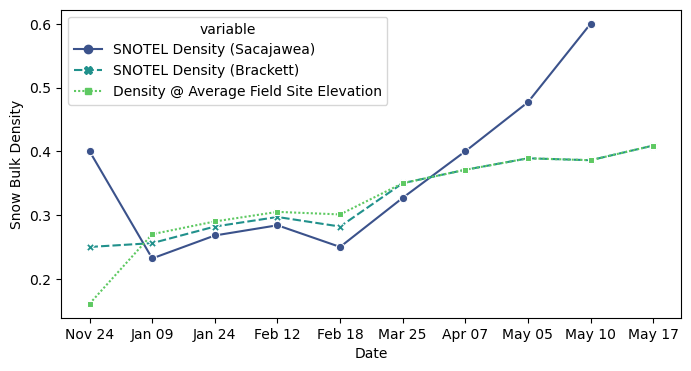

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
snotel = sns.lineplot(data = snotel_plt, x = 'label', y = 'value', hue = 'variable', palette = 'viridis',
                     style = 'variable', markers = True)
snotel.set_xlabel("Date", fontsize = 10)
snotel.set_ylabel("Snow Bulk Density")
snotel.tick_params(axis="y")

plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/SNOTEL_dens.png', bbox_inches = "tight")

In [7]:
methods = pd.read_csv('Methods_Dens.csv')
methods['Date'] = pd.to_datetime(snotel_dens['Date'], format='%Y%m%d')

In [9]:
methods['label'] = pd.to_datetime(methods['Date']).dt.strftime('%b %d')
methods_plt = pd.melt(methods,id_vars = ['label'],value_vars = ['Manual','SNOTEL','∆SNOW'])
methods_plt.head()

,label,variable,value
0,Nov 24,Manual,NaN
1,Jan 09,Manual,0.243
2,Jan 24,Manual,NaN
3,Feb 12,Manual,0.336
4,Feb 18,Manual,0.248


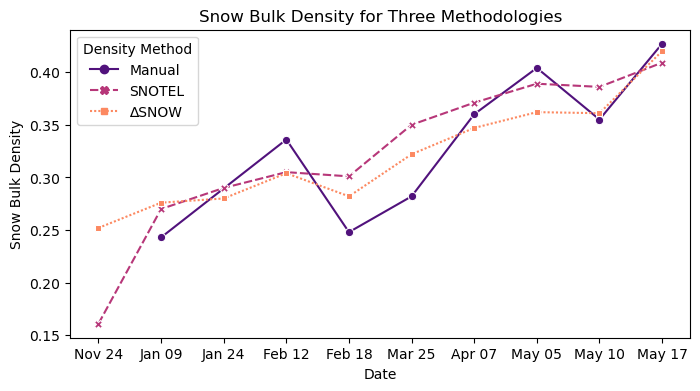

In [10]:
# Create a visual of the three density approaches for each collection day
fig, ax = plt.subplots(figsize=(8, 4))
methods = sns.lineplot(data = methods_plt, x = 'label', y = 'value', hue = 'variable', palette = 'magma',
                     style = 'variable', markers = True)
methods.set_xlabel("Date", fontsize = 10)
methods.set_ylabel("Snow Bulk Density")
methods.tick_params(axis="y")


# new_title = 'Density Method'
# methods.legend.set_title(new_title)
methods.legend(title='Density Method')

plt.title('Snow Bulk Density for Three Methodologies')

plt.savefig('/Users/f67f911/Desktop/HG2022_Data/Figures/methods_dens.png', bbox_inches = "tight")